# Load libraries

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.model_selection import train_test_split

# Load data

In [0]:
def load_data_regression():
  diabetes = datasets.load_diabetes()
  return train_test_split(diabetes.data, diabetes.target, test_size=.25, random_state=0)

In [0]:
def load_data_classification():
  digits = datasets.load_digits()
  return train_test_split(digits.data,digits.target,test_size=.25,random_state=0)

In [0]:
# adaboost provides two types of models
# 1. AdaBoostClassifier for classification
# 2. AdaBoostRegressor for regression

In [0]:
# class sklearn.ensenmble.AdaBoostClassifier()

## Params
# base_estimator: the base classifier or regressor, the default estimator is DecisionTreeClassifier. The base estimator should support the learning using sample weights
# n_estimators: integer, designate the number of base estimator, the default value is 50. The actually used estimators could be less if it performs very well, it converges
# learning_rate: float, the default is 1. Generally the smaller the learning rate, the more the estimators. The learning rate has trade off with n_estimators, so it will be changed during learning process
# algorithm: string, the default algo is 'SAMME.R' which support the computation of different classes. Another one is 'SAMME'
# random_state: integer or None or a RandomState instance

## Attributes
# estimators_: all of trained base classifiers
# classes_: all classes
# n_classes_: the number of data in each class
# estimator_weights_: the weight of estimators
# feature_importances_: the importance of every feature

## Methods
# fit(X,y)
# predict(X)
# predict_log_proba(X)
# score(X,y), accuracy
# staged_predict_proba(X), array of probabilities, every iteration
# staged_predict(X), for each iteration, the predicted value of each data point
# staged_score(X,y)

# test AdaBoostClassifier

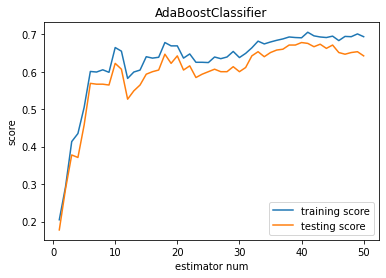

In [0]:
def test_AdaBoostClassifier(*data):
  X_train, X_test, y_train, y_test = data
  clf = ensemble.AdaBoostClassifier(learning_rate = .1)
  clf.fit(X_train, y_train)
  # plt
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  estimators_num = len(clf.estimators_)
  X = range(1, estimators_num+1)
  ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label='training score')
  ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label='testing score')
  ax.set_xlabel("estimator num")
  ax.set_ylabel("score")
  ax.legend(loc='best')
  ax.set_title("AdaBoostClassifier")
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier(X_train, X_test, y_train, y_test)
# the ensemble learner can be good at defending overfitting

# Consider the impact from different base estimators

/local_disk0/.ephemeral_nfs/cluster_libraries/python/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


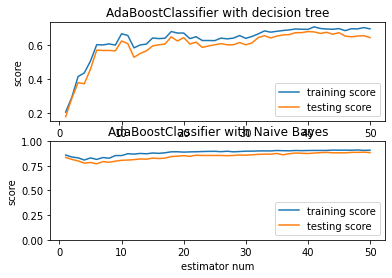

In [0]:
def test_AdaBoostClassifier_base(*data):
  from sklearn.naive_bayes import GaussianNB
  X_train, X_test, y_train, y_test = data

  # base estimator
  clf = ensemble.AdaBoostClassifier(learning_rate = .1)
  clf.fit(X_train, y_train)
  # plt
  fig = plt.figure()
  ax = fig.add_subplot(2,1,1)
  estimators_num = len(clf.estimators_)
  X = range(1, estimators_num+1)
  ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label='training score')
  ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label='testing score')
  ax.set_xlabel("estimator num")
  ax.set_ylabel("score")
  ax.legend(loc='lower right')
  ax.set_title("AdaBoostClassifier with decision tree")

  # naive bayes estimator
  clf = ensemble.AdaBoostClassifier(learning_rate = .1, base_estimator=GaussianNB())
  clf.fit(X_train, y_train)
  # plt
  ax = fig.add_subplot(2,1,2)
  estimators_num = len(clf.estimators_)
  X = range(1, estimators_num+1)
  ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label='training score')
  ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label='testing score')
  ax.set_xlabel("estimator num")
  ax.set_ylabel("score")
  ax.legend(loc='lower right')
  ax.set_ylim(0,1)
  ax.set_title("AdaBoostClassifier with Naive Bayes")
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier_base(X_train, X_test, y_train, y_test)
# so, the estimator using in Adaboost should support the sample weighting and if the algorithm is SAMME.R, each estimator should support the calculation of probabilities of each class

# Consider the impact from learning rate

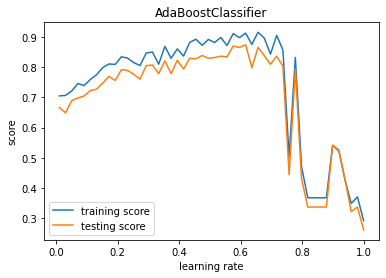

In [0]:
def test_AdaBoostClassifier_learning_rate(*data):
  X_train, X_test, y_train, y_test = data
  learning_rates = np.linspace(.01,1)

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  testing_scores = []
  training_scores = []

  for learning_rate in learning_rates:
    clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500)
    clf.fit(X_train, y_train)
    training_scores.append(clf.score(X_train, y_train))
    testing_scores.append(clf.score(X_test,y_test))

  ax.plot(learning_rates, training_scores, label='training score')
  ax.plot(learning_rates, testing_scores, label='testing score')
  ax.set_xlabel("learning rate")
  ax.set_ylabel("score")
  ax.legend(loc='best')
  ax.set_title("AdaBoostClassifier")
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier_learning_rate(X_train, X_test, y_train, y_test)

# when using SAMME.R, when learning rate is small, the accuracy consistently increases, but if more than 0.7, the learning rate increasing can lead to the downside of accuracy
# per sklearn official, small learnig rate requires more estimators to make sure the ensemble performance and bigger learning rate requires less estimators, so the smaller learning rate can have better performace, learning rate should be less than 0.1 generally

# but if we use SAMME, it will increase although the learning rate increases, that because the number of estimators is fixed(like 500) that makes we can get good performance from the good individual estimators. Even though the learning rate is too big.

# now consider the impact from algorithm

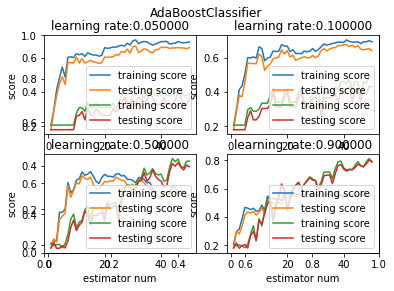

In [0]:
def test_AdaBoostClassifier_algorithm(*data):
  X_train, X_test, y_train, y_test = data
  learning_rates = [0.05,0.1,.5,.9]
  algorithms = ['SAMME.R','SAMME']

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)
  testing_scores = []
  training_scores = []

  for i,learning_rate in enumerate(learning_rates):
    ax = fig.add_subplot(2,2,i+1)
    for i, algorithm in enumerate(algorithms):
      clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, algorithm=algorithm)
      clf.fit(X_train, y_train)

      # plot
      estimators_num = len(clf.estimators_)
      X=range(1,estimators_num+1)
      ax.plot(list(X), list(clf.staged_score(X_train, y_train)), label='training score')
      ax.plot(list(X), list(clf.staged_score(X_test, y_test)), label='testing score')
      ax.set_xlabel("estimator num")
      ax.set_ylabel("score")
      ax.legend(loc='lower right')
      ax.set_title("learning rate:%f"%learning_rate)
  fig.suptitle('AdaBoostClassifier')
  plt.show()

X_train, X_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier_algorithm(X_train, X_test, y_train, y_test)
# when the learning rate is small, SAMME.R is good but SAMME.R is worse when the learning rate is too big